In [20]:
import numpy as np
import keras
from keras.datasets import reuters
from keras.layers import Dense,Activation
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
import matplotlib.pyplot as plt

In [21]:
(x_train, y_train), (x_test,y_test) = reuters.load_data() 
x=np.concatenate ((x_train, x_test),axis=0) 
y=np.concatenate((y_train, y_test), axis=0)

In [11]:
x


array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

In [12]:
y

array([ 3,  4,  3, ...,  3,  3, 24], dtype=int64)

In [10]:
print('training data')
print(x.shape)
print(y.shape)

training data
(11228,)
(11228,)


In [13]:
print('classes:')
print(np.unique(y))

classes:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [14]:
print('no  of words')
print(len(np.unique(np.hstack(x))))

no  of words
30980


In [15]:
print('review length')
result=[len(x) for x in x]
print('mean %.2f words (%f)' %(np.mean(result),np.std(result)))

review length
mean 145.96 words (145.878476)


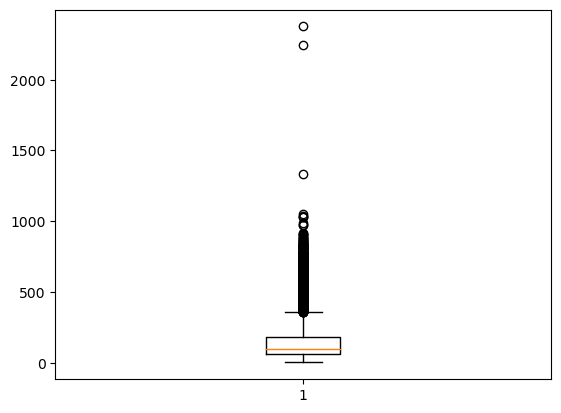

In [22]:
plt.boxplot(result)
plt.show()

In [24]:
num_words=1000
tokenizer=Tokenizer(num_words,num_words)
x_train=tokenizer.sequences_to_matrix(x_train,mode='binary')
x_test=tokenizer.sequences_to_matrix(x_test,mode='binary')

In [25]:
num_classes=np.max(y_train)+1
y_train=keras.utils.to_categorical(y_train,num_classes)

In [26]:
y_test=keras.utils.to_categorical(y_test,num_classes)

In [31]:
model=Sequential()
model.add(Dense(572,input_shape=(num_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 572)               572572    
                                                                 
 activation (Activation)     (None, 572)               0         
                                                                 
 dense_3 (Dense)             (None, 46)                26358     
                                                                 
 activation_1 (Activation)   (None, 46)                0         
                                                                 
Total params: 598,930
Trainable params: 598,930
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
281/281 [==============================] - 3s 8ms/step - loss: 1.2187 - accuracy: 0.7325 - val_loss: 0.9156 - val_accuracy: 0.7832
Epoch 2/10
281/281 [==============================] - 2s 8ms/step - loss: 0.5665 - accuracy: 0.8677 - val_loss: 0.8465 - val_accuracy: 0.7961
Epoch 3/10
281/281 [==============================] - 2s 8ms/step - loss: 0.3614 - accuracy: 0.9116 - val_loss: 0.8713 - val_accuracy: 0.7934
Epoch 4/10
281/281 [==============================] - 2s 8ms/step - loss: 0.2693 - accuracy: 0.9329 - val_loss: 0.9225 - val_accuracy: 0.7890
Epoch 5/10
281/281 [==============================] - 2s 8ms/step - loss: 0.2232 - accuracy: 0.9434 - val_loss: 0.9563 - val_accuracy: 0.7881
Epoch 6/10
281/281 [==============================] - 2s 8ms/step - loss: 0.2025 - accuracy: 0.9473 - val_loss: 0.9758 - val_accuracy: 0.7854
Epoch 7/10
281/281 [==============================] - 2s 8ms/step - loss: 0.1823 - accuracy: 0.9495 - val_loss: 0.9763 - val_accuracy: 0.7934
Epoch 

In [36]:
score=model.evaluate(x_test,y_test,batch_size=32)
print("Accuracy:",score[1])

71/71 [==============================] - 0s 2ms/step - loss: 1.0358 - accuracy: 0.7912
Accuracy: 0.7911843061447144


In [37]:
predictions=model.predict(x_test)
print(predictions)

71/71 [==============================] - 0s 1ms/step
[[1.41744999e-06 3.06168931e-06 3.24410632e-09 ... 6.66278140e-07
  4.49569804e-08 8.35878069e-08]
 [2.85084843e-05 1.40541373e-02 9.66785534e-04 ... 1.62131633e-04
  9.09597020e-06 2.20999820e-04]
 [1.74901597e-05 9.93048668e-01 1.42373920e-05 ... 8.02855357e-06
  1.23922955e-05 5.23296330e-05]
 ...
 [2.07932067e-06 9.72881026e-05 3.45666353e-06 ... 1.53802773e-06
  4.60206593e-08 2.60870661e-06]
 [2.75741040e-04 4.57536057e-02 7.92870065e-04 ... 2.88642914e-05
  2.72905140e-06 1.31376801e-05]
 [1.44118785e-05 4.26297009e-01 1.10603450e-03 ... 4.28546628e-05
  6.06473477e-05 8.66871051e-05]]
